# Overview
this is binary classification problem.

Predict 0, 1 (Survived) from Titanic Data

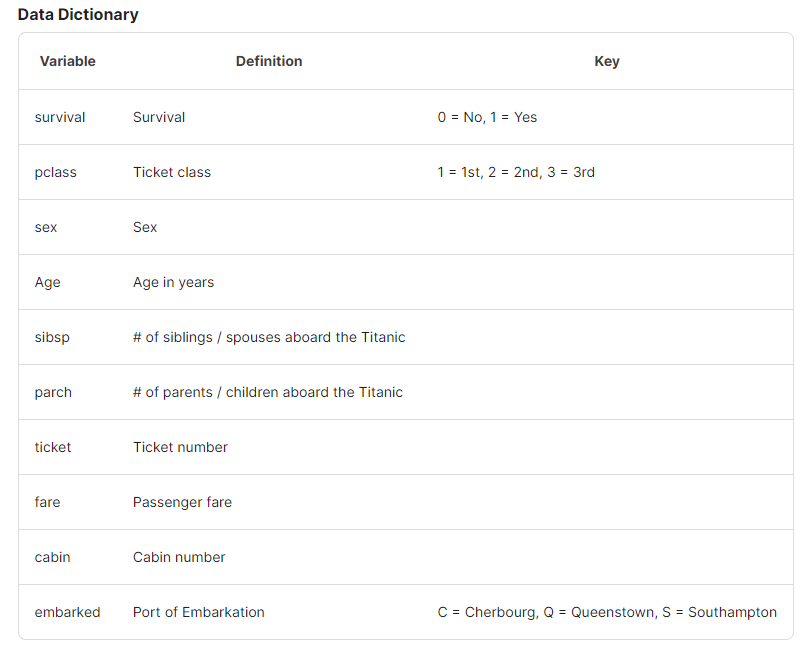


# 1. Initial hypothesis

- 선실 위치에 따라 생존 비율에 영향이 있을 것이다
- 보편적으로 남자의 운동 신경이 좋기 때문에 생존률이 높을 것이다


# 2. EDA

### 1) 라이브러리 불러오기

In [95]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### 2) 데이터 불러오기

In [21]:
os.getcwd()

'C:\\Users\\dmlql\\KT_AIVLE\\Kaggle'

In [25]:
train_data = pd.read_csv('./2024.05_Titanic/data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3) 데이터 정보확인

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 확인 사항
    - Age가 float인 이유?
    - Fare의 극단치 제거 필요
    - Cabin 결측치 많아서 제거 필요
    - Age 결측치 처리 필요

#### 3-1) Age가 float인 이유?
* 나이에 개월 수 정보까지 포함되어 있는 듯 보인다

In [56]:
temp = train_data.dropna(subset=['Age'])
print(list(temp.loc[temp['Age'] - round(temp['Age']) != 0, 'Age']))


[28.5, 0.83, 14.5, 70.5, 32.5, 32.5, 36.5, 55.5, 40.5, 45.5, 20.5, 23.5, 0.92, 45.5, 0.75, 40.5, 0.75, 24.5, 28.5, 0.67, 30.5, 0.42, 30.5, 0.83, 34.5]


### 4) 단변량 분석

In [64]:
def plot_c(target, df):
    sns.countplot(x=target, data=df)

#### 4-1) Categorical
* Survived, Pclass, Sex, Cabin, Embarked

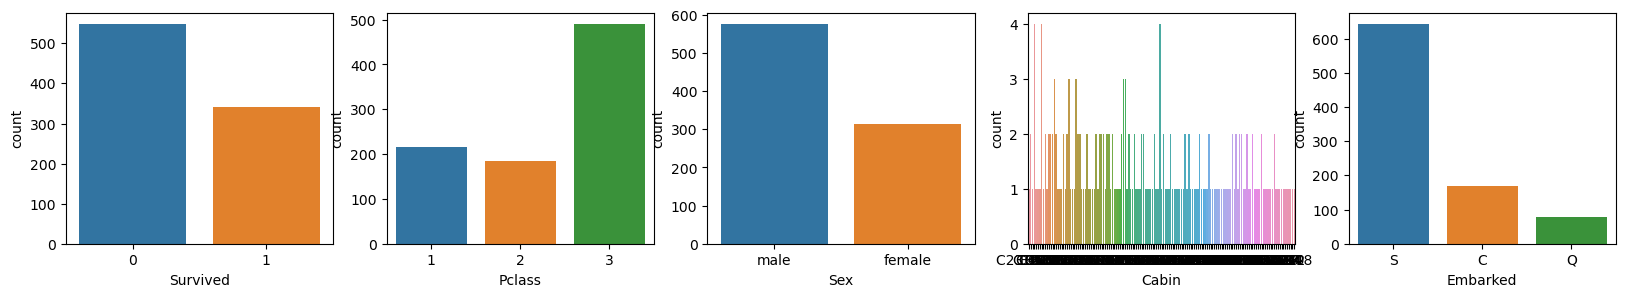

In [70]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']

plt.figure(figsize=(20, 3))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 5, i+1)
    sns.countplot(x=col, data=train_data)

plt.show()

#### 4-2) Numeric
* PassengerId, Age, SibSp, Parch, Fare

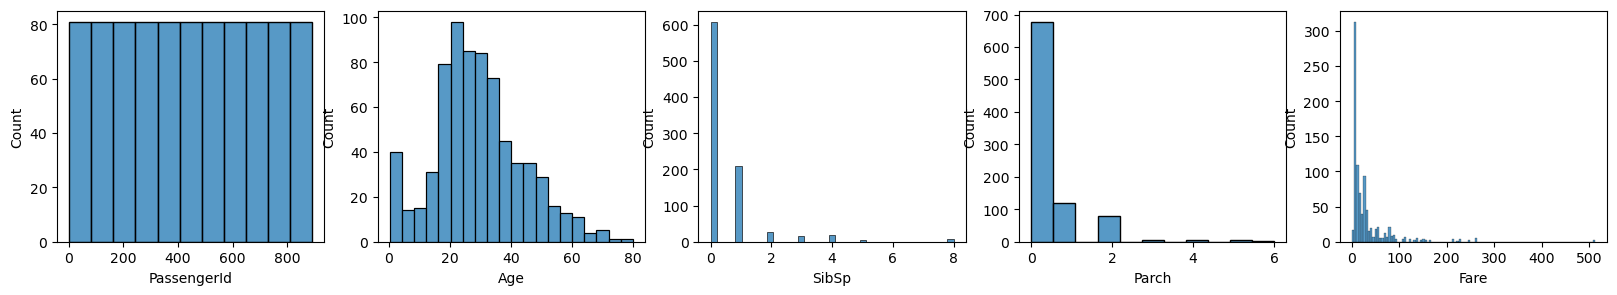

In [71]:
num_cols = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(20, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 5, i+1)
    sns.histplot(x=col, data=train_data)
    
plt.show()

* 확인 사항
    - 35%의 인원만 살아남음
    - 3 class가 가장 많음
    - 남녀 비율이 65:35
    - Southhampton에서 탑승한 사람이 대부분
    - 나이대를 보면 20~30대와 어린 사람들이 많은 것을 보아 젊은 부모들로 예측할 수 있음
    - 평균 비용은 약 30
    

### 5. 이변량 분석

<Axes: >

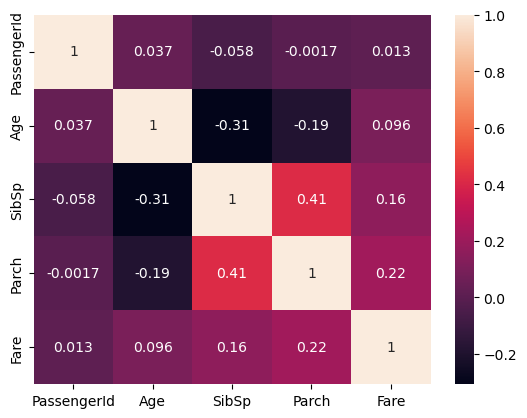

In [90]:
sns.heatmap(train_data.loc[:, num_cols].corr(),
           annot=True)

#### 5-1) 범주형 -> 범주형
* target : 'Survived'
* Pclass, Sex, Embarked

<Axes: xlabel='Embarked', ylabel='count'>

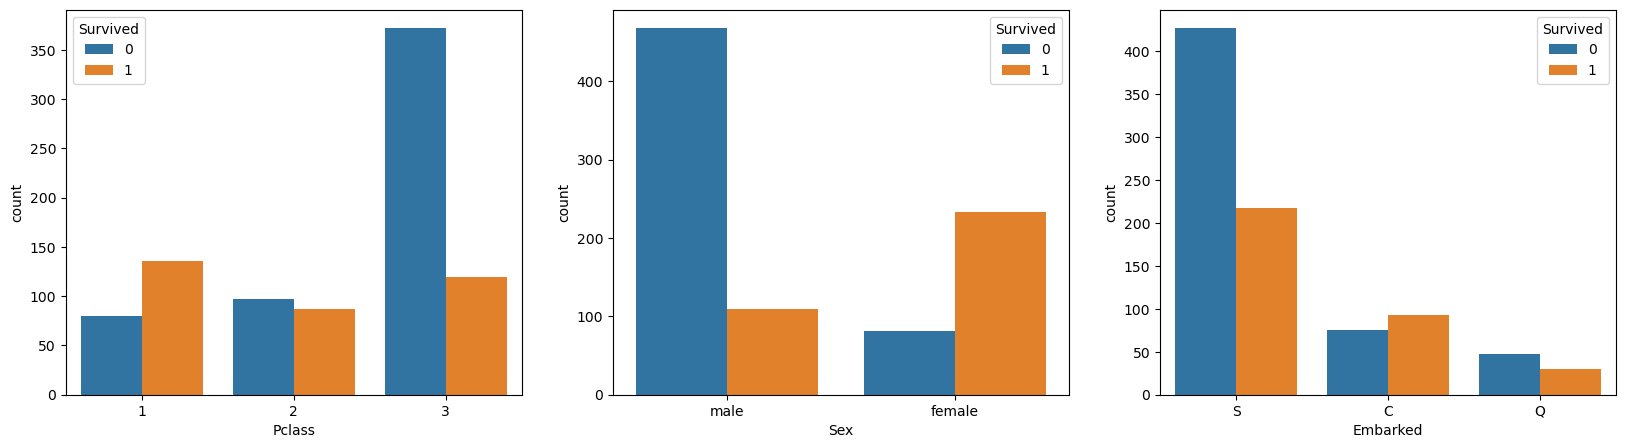

In [94]:
target = 'Survived'

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(x='Pclass', hue=target, data=train_data)

plt.subplot(1,3,2)
sns.countplot(x='Sex', hue=target, data=train_data)

plt.subplot(1,3,3)
sns.countplot(x='Embarked', hue=target, data=train_data)

In [98]:
# 기대빈도와 실제 데이터의 차이 : 카이제곱 통계량
table = pd.crosstab(train_data['Survived'], train_data['Pclass'])
print('Pclass : ',spst.chi2_contingency(table))

table = pd.crosstab(train_data['Survived'], train_data['Sex'])
print('Sex : ',spst.chi2_contingency(table))

table = pd.crosstab(train_data['Survived'], train_data['Embarked'])
print('Embarked : ',spst.chi2_contingency(table))

Pclass :  Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))
Sex :  Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))
Embarked :  Chi2ContingencyResult(statistic=26.48914983923762, pvalue=1.769922284120912e-06, dof=2, expected_freq=array([[103.7480315,  47.5511811, 397.7007874],
       [ 64.2519685,  29.4488189, 246.2992126]]))


* Pclass
    - 티켓 등급이 좋을 수록 생존률이 높다
* Sex
    - 남성의 생존률이 여성보다 압도적으로 낮다
* Embarked
    - 탑승 지역에 따라 생존률에 차이가 있다
 

#### 5-2) 숫자형 -> 범주형
* target : 'Survived'
* 'PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'

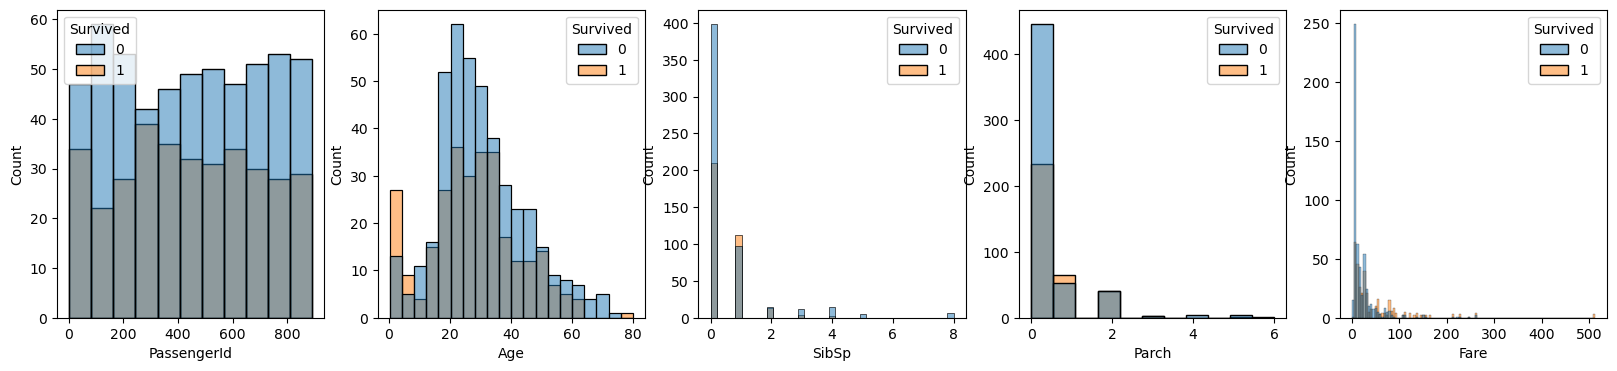

In [101]:
plt.figure(figsize=(20, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1,5,i+1)
    sns.histplot(x=col, hue=target, data=train_data)

* 전반적으로 Survived와 상관성을 보인다